In [42]:
import cv2
import numpy as np
import os
import glob
from PIL import Image
#import matplotlib.pyplot as plt
import IPython
from IPython.display import display

In [43]:
def show(img):
    
    _,ret = cv2.imencode('.png', img)
    #print(ret)
    i = IPython.display.Image(data=ret)
    display(i)
    

def morph(img,filename):
    
    # EROSION---------------------------
    kernel = np.ones((10,10), np.uint8) 
    img_erod = cv2.erode(img, kernel, iterations=4) 
    #img_erosion = cv2.dilate(img_erosion, kernel, iterations=1)
    #----------------------------------------------
    
    # GAUSSIAN BLURR-------------------------------
    img_erod_gaus = cv2.GaussianBlur(img_erod,(5,5),0)
    #img_erosion_g = cv2.fastNlMeansDenoisingColored(img_erosion_g,None,10,10,7,21)
    #img_erosion_g = cv2.filter2D(img_erosion,-1,kernel_g)
    #----------------------------------------------
    
    #OFFLINE IMAGE FROM DATABASE------------------
    print('OFFLINE IMAGE FROM DATABASE')
    Ground_Truth = Image.open(str(filename) + '.tiff')
    display(Ground_Truth)
    width, height = Ground_Truth.size
    #----------------------------------------------
    #OFFLINE IMAGE GENERATED
    print('OFFLINE IMAGE GENERATED')
    img_erod_gaus = cv2.resize(img_erod_gaus, dsize = (width, height), interpolation=cv2.INTER_CUBIC)
    show(img_erod_gaus)
    #----------------------------------------------
    
    
    #cv2.namedWindow('Output', cv2.WINDOW_NORMAL) 
    #cv2.imshow('Output', img_erosion_gaussian)
    #cv2.waitKey(0)  
    #cv2.destroyAllWindows() 

In [44]:
def extract(files):
    X = []
    Y = []

    filename = files.split('.')[0]
    with open(files, "r") as f:
        
        lines = f.readlines()
        #lines = lines.strip('\n')
        
        for l in lines:
            
            if l[0] != '.' and l[0] != '-' and l != '\n':
                
                #------UNCOMMENT FOR TAMIL SCRIPT-------------
                y_coord = int(l.split(' ')[0])
                x_coord = int(l.split(' ')[1])
                #------------------------------------
                
                #------UNCOMMENT FOR DEVANAGRI SCRIPT---------
                #x_coord = l.split(',')[1]
                #x_coord = int(X.split('.')[0])
                #y_coord = l.split(',')[0]
                #y_coord = int(Y.split('.')[0])
                #------------------------------------
                
                X.append(x_coord)
                Y.append(y_coord)
    
    height_x = max(X) - min(X)    # HEIGHT OF X
    height_y = max(Y) - min(Y)    # HEIGHT OF Y
    MIN_X = min(X)
    MIN_Y = min(Y)
    
    # SUBTRACTING MIN OF X AND Y CO-ORDINATES
    for i in range(len(X)):
        X[i] = X[i] - MIN_X
        Y[i] = Y[i] - MIN_Y
        
    #print(max(x),max(y),min(x),min(y))
    
    # MATRIX FOR STORING IMAGE - INITIALLY EMPTY
    IMAGE = np.full((height_x + 100,height_y + 100),255, np.uint8)
    
    for i in range(len(X)):
        IMAGE[X[i]+50 , Y[i]+50] = 0   # INCLUDING THE CO-ORDINATE
        
        #-----TRIED DIDN'T WORK!-----------------
        #slopey = Y[i+1] - Y[i]
        #slopex = X[i+1] - X[i]
        #alpha = 0.2
        #while X[i]+ (slopex*alpha) < X[i+1] and Y[i]+ (slopey*alpha) < Y[i+1]:
            #IMAGE[X[i]+ int(slopex*alpha) + 50, Y[i]+ int(slopey*alpha) + 50] = 0
        #----------------------------------------    
        
        # INCLUDING MID-POINT IN BETWEEN TWO CO-ORDINATES    
        if (i + 1) < len(X):
            a1 = int((X[i] + X[i+1])/2) + 50
            b1 = int((Y[i] + Y[i+1])/2) + 50
        IMAGE[a1,b1] = 0
    
    morph(IMAGE,filename)

OFFLINE IMAGE FROM DATABASE


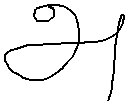

OFFLINE IMAGE GENERATED


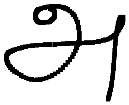

OFFLINE IMAGE FROM DATABASE


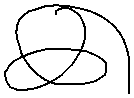

OFFLINE IMAGE GENERATED


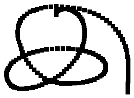

OFFLINE IMAGE FROM DATABASE


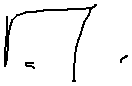

OFFLINE IMAGE GENERATED


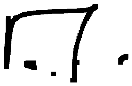

OFFLINE IMAGE FROM DATABASE


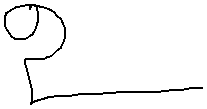

OFFLINE IMAGE GENERATED


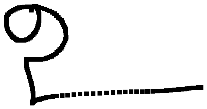

OFFLINE IMAGE FROM DATABASE


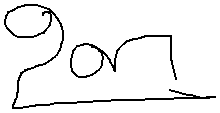

OFFLINE IMAGE GENERATED


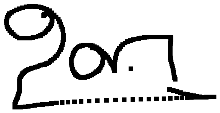

OFFLINE IMAGE FROM DATABASE


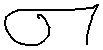

OFFLINE IMAGE GENERATED


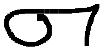

OFFLINE IMAGE FROM DATABASE


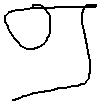

OFFLINE IMAGE GENERATED


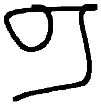

OFFLINE IMAGE FROM DATABASE


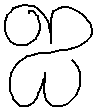

OFFLINE IMAGE GENERATED


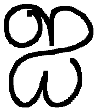

OFFLINE IMAGE FROM DATABASE


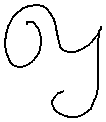

OFFLINE IMAGE GENERATED


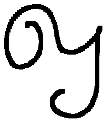

OFFLINE IMAGE FROM DATABASE


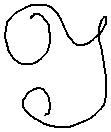

OFFLINE IMAGE GENERATED


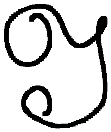

In [45]:
def main():
    
    #for files in glob.glob("Hindi/*"):
    for files in glob.glob("Tamil/*txt"):
        extract(files)

if __name__ == "__main__": 
    main()